In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [ ]:
geography  = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
X=pd.concat([X,geography,gender],axis=1)
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Importing keras library and packages

In [ ]:
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Initializing ANN and adding the input layer and the hidden layers

In [ ]:
classifier = Sequential()
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 9s 9ms/step - loss: 0.5423 - accuracy: 0.7897 - val_loss: 0.4916 - val_accuracy: 0.7952
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4745 - accuracy: 0.8000 - val_loss: 0.4628 - val_accuracy: 0.7982
Epoch 3/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4501 - accuracy: 0.8041 - val_loss: 0.4493 - val_accuracy: 0.8027
Epoch 4/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4365 - accuracy: 0.8113 - val_loss: 0.4425 - val_accuracy: 0.8069
Epoch 5/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4290 - accuracy: 0.8149 - val_loss: 0.4389 - val_accuracy: 0.8118
Epoch 6/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4246 - accuracy: 0.8194 - val_loss: 0.4365 - val_accuracy: 0.8080
Epoch 7/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4203 - accuracy: 0.8216 - val_loss: 0.4331 - val_accuracy: 0.8092

In [ ]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


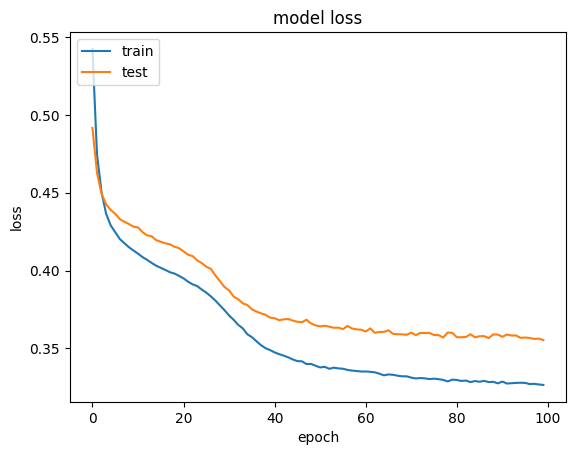

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

Predicting the test set results

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1525,   70],
       [ 208,  197]])

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.861